<a href="https://colab.research.google.com/github/rj21959/CodeAlpha_project/blob/main/CodeAlpha_CarprisePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload archive (3).zip


Saving archive (3).zip to archive (3) (1).zip


Extract the zip

In [ ]:
import zipfile
import os

# Replace this with the exact name you upload (Google Colab might rename it slightly)
zip_path = "archive (3).zip"  # or 'archive3.zip' if renamed

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("car_data")  # Extract to folder

# Check extracted files
os.listdir("car_data")


['car data.csv']

Load the CSV file

In [ ]:
import pandas as pd

# Load the extracted CSV file
df = pd.read_csv("car_data/car data.csv")
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Data Preprocessing and Feature Engineering

In [ ]:
# Add a new feature for car age
df['Car_Age'] = 2025 - df['Year']

# Drop unused columns
df.drop(['Car_Name', 'Year'], axis=1, inplace=True)

# Convert categorical columns to numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# View the transformed data
df.head()


,Selling_Price,Present_Price,Driven_kms,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,False,True,False,True
1,4.75,9.54,43000,0,12,True,False,False,True
2,7.25,9.85,6900,0,8,False,True,False,True
3,2.85,4.15,5200,0,14,False,True,False,True
4,4.60,6.87,42450,0,11,True,False,False,True


Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Training – Random Forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", round(mae, 2))
print("R-squared Score:", round(r2, 2))


Mean Absolute Error: 0.64
R-squared Score: 0.96


Visualization: Actual vs Predicted

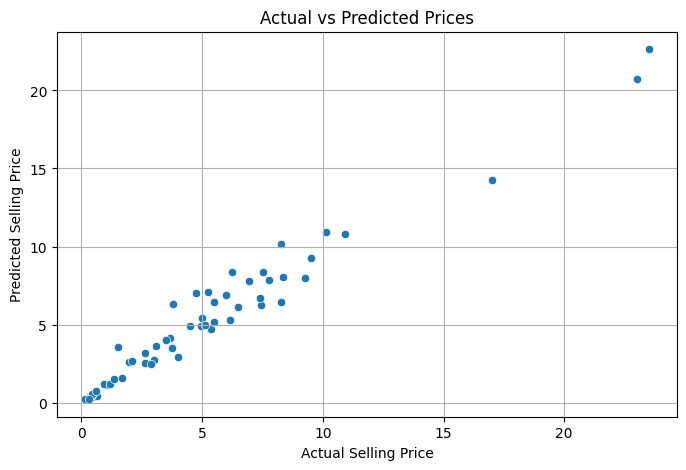

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()
